# Table of contents

1. Importing libraries and data
2. Plotting data
3. Wrangling data and subsetting
4. Time series analysis: decomposition
5. Checking for stationarity
- Dickey-Fuller Stationarity test
- Autocorrelation
6. Stationarizing the data

# 1. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

In [2]:
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [3]:
# Importing dataset

df = pd.read_csv(r'/Users/zoey/Career Foundry Stuff/Achievement 6/cleaned_NBA_data.csv')

In [4]:
df.shape

(12844, 22)

In [5]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,attended_college
0,Randy Livingston,HOU,22,193.04,94.800728,Louisiana State,USA,1996,2,42,...,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97,True
1,Gaylon Nickerson,WAS,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97,True
2,George Lynch,VAN,26,203.20,103.418976,North Carolina,USA,1993,1,12,...,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97,True
3,George McCloud,LAL,30,203.20,102.058200,Florida State,USA,1989,1,7,...,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97,True
4,George Zidek,DEN,23,213.36,119.748288,UCLA,USA,1995,1,22,...,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97,True


# 2. Plotting data

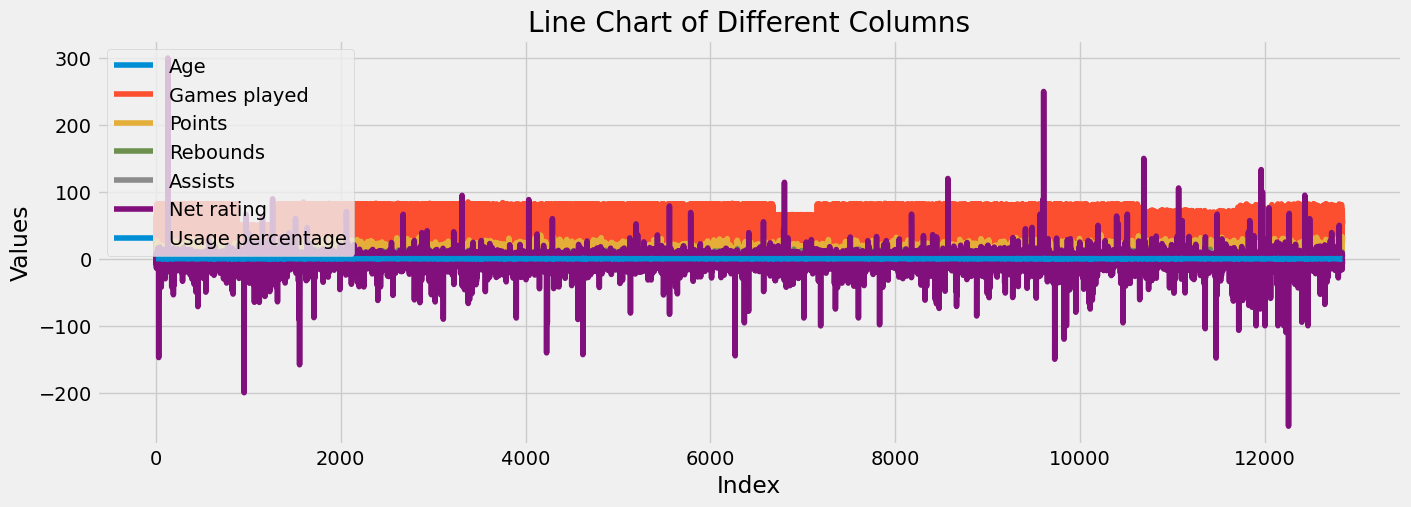

In [6]:
# Plotting the data using matplotlib
plt.figure(figsize=(15, 5), dpi=100)

# Plot different columns separately
plt.plot(df['age'], label='Age')
plt.plot(df['gp'], label='Games played')
plt.plot(df['pts'], label='Points')
plt.plot(df['reb'], label='Rebounds')
plt.plot(df['ast'], label='Assists')
plt.plot(df['net_rating'], label='Net rating')
plt.plot(df['usg_pct'], label='Usage percentage')

# Add labels and legend
plt.title('Line Chart of Different Columns')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()

# Show plot
plt.show()

# 3. Wrangling data and subsetting

In [7]:
# Reset index to use the "Date" column as a filter

df_2 = df.reset_index()

In [8]:
df_2.head()

,index,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,attended_college
0,0,Randy Livingston,HOU,22,193.04,94.800728,Louisiana State,USA,1996,2,...,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97,True
1,1,Gaylon Nickerson,WAS,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97,True
2,2,George Lynch,VAN,26,203.20,103.418976,North Carolina,USA,1993,1,...,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97,True
3,3,George McCloud,LAL,30,203.20,102.058200,Florida State,USA,1989,1,...,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97,True
4,4,George Zidek,DEN,23,213.36,119.748288,UCLA,USA,1995,1,...,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97,True


In [9]:
# Drop rows where 'draft_year' is 'undrafted'
df_2 = df[df['draft_year'].str.strip().str.lower() != 'undrafted']

# Set the "draft_year" column as the index
df_2['datetime'] = pd.to_datetime(df_2['draft_year'], errors='coerce')  # Create a datetime column from "draft_year"
df_2 = df_2.set_index('datetime')  # Set the datetime as the index of the dataframe.
df_2.drop(['draft_year'], axis=1, inplace=True)  # Drop the "draft_year" column.
df_2.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_round,draft_number,gp,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,attended_college
datetime,,,,,,,,,,,,,,,,,,,,,
1996-01-01,Randy Livingston,HOU,22,193.04,94.800728,Louisiana State,USA,2,42,64,...,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97,True
1994-01-01,Gaylon Nickerson,WAS,28,190.50,86.182480,Northwestern Oklahoma,USA,2,34,4,...,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97,True
1993-01-01,George Lynch,VAN,26,203.20,103.418976,North Carolina,USA,1,12,41,...,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97,True
1989-01-01,George McCloud,LAL,30,203.20,102.058200,Florida State,USA,1,7,64,...,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97,True
1995-01-01,George Zidek,DEN,23,213.36,119.748288,UCLA,USA,1,22,52,...,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97,True


In [10]:
df_2.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_round', 'draft_number',
       'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct',
       'usg_pct', 'ts_pct', 'ast_pct', 'season', 'attended_college'],
      dtype='object')

In [11]:
# Dropping categorical columns

columns_to_drop = ["player_name", "team_abbreviation", "college", "country", "attended_college"]
df_2 = df_2.drop(columns=columns_to_drop)

In [12]:
df_2.head()

,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
datetime,,,,,,,,,,,,,,,,
1996-01-01,22,193.04,94.800728,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1994-01-01,28,190.50,86.182480,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
1993-01-01,26,203.20,103.418976,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
1989-01-01,30,203.20,102.058200,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
1995-01-01,23,213.36,119.748288,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [13]:
# Drop all columns except the datetime index and the "pts" column
df_2 = df_2[['pts']]

# Display the updated DataFrame
df_2.head()

,pts
datetime,
1996-01-01,3.9
1994-01-01,3.8
1993-01-01,8.3
1989-01-01,10.2
1995-01-01,2.8


In [15]:
# Drop duplicates
df_2 = df_2[~df_2.index.duplicated()]

# Set frequency
df_2 = df_2.asfreq("D")

# Fill missing values with forward fill
df_2 = df_2.fillna(method='ffill')

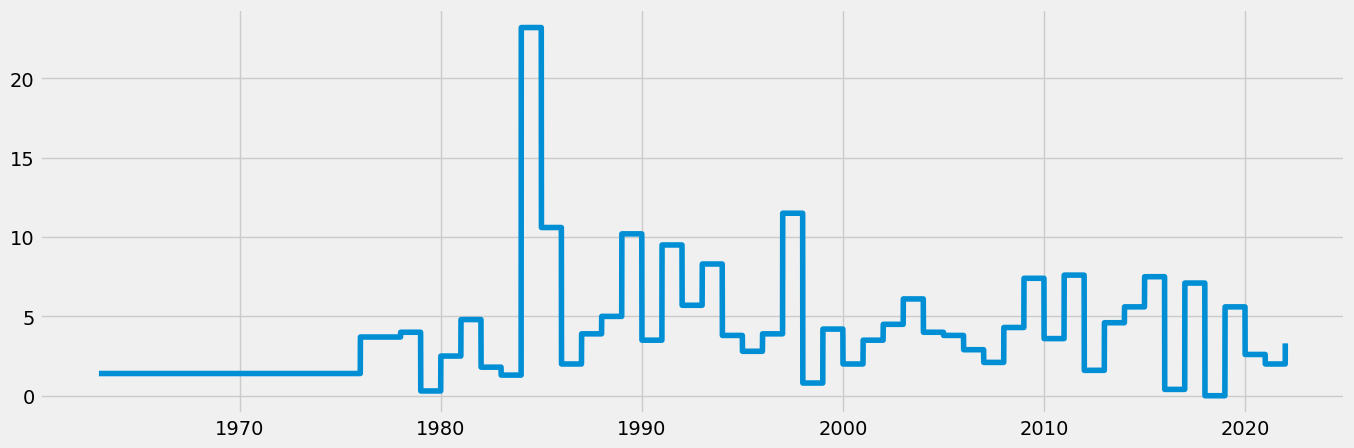

In [16]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_2)

# 4. Time series analysis: decomposition

In [17]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_2, model='additive')

In [18]:
# Defining a fixed size for all special charts.
    
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

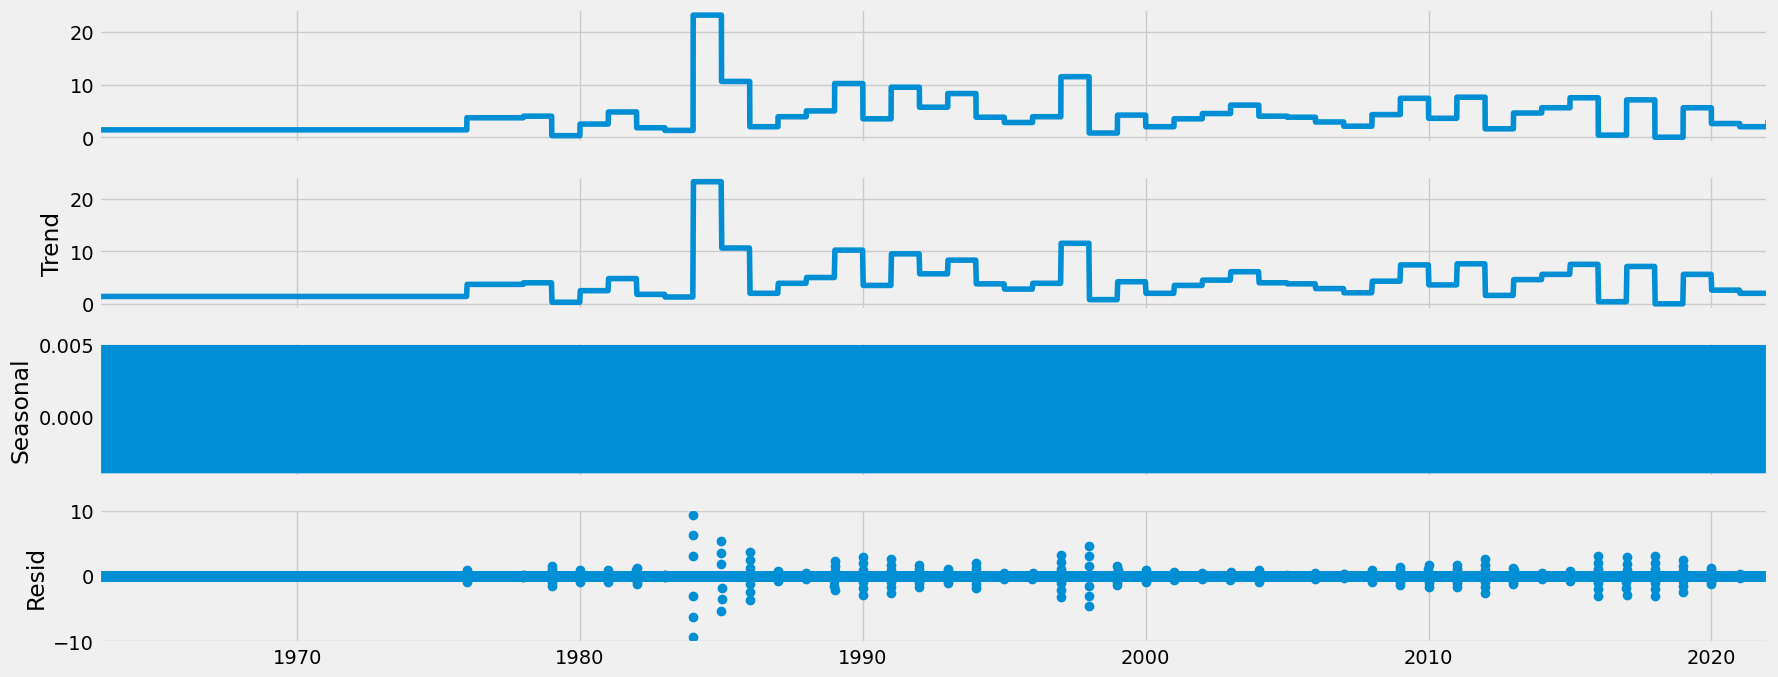

In [19]:
# Plot the separate components

decomposition.plot()
plt.show()

Based on the above, there does not appear to be a strong linear trend up or down. Since the data and the trend lines look to be the same, this indicates that there is not much noise in the data and it does not need to be smoothed. In terms of unexplained noise (residual) we see some spikes around 1985 and 1998. 

# 5. Checking for stationarity
- Dickey-Fuller Stationarity test
- Autocorrelation

In [21]:
# Import the adfuller() function

from statsmodels.tsa.stattools import adfuller

# Defining the function and performing the Dickey-Fuller test

def dickey_fuller(timeseries):
    
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Applying the test using the function on the time series

dickey_fuller(df_2['pts'])

Dickey-Fuller Stationarity test:
Test Statistic                    -5.090751
p-value                            0.000015
Number of Lags Used                0.000000
Number of Observations Used    21550.000000
Critical Value (1%)               -3.430653
Critical Value (5%)               -2.861674
Critical Value (10%)              -2.566841
dtype: float64


Since the p-value is less than 0.05, it can be considered significant. 
Because the test statistic is smaller than the critical value we CAN reject the null-hypothesis. This means that there is no unit root in the data and the data is stationary. 

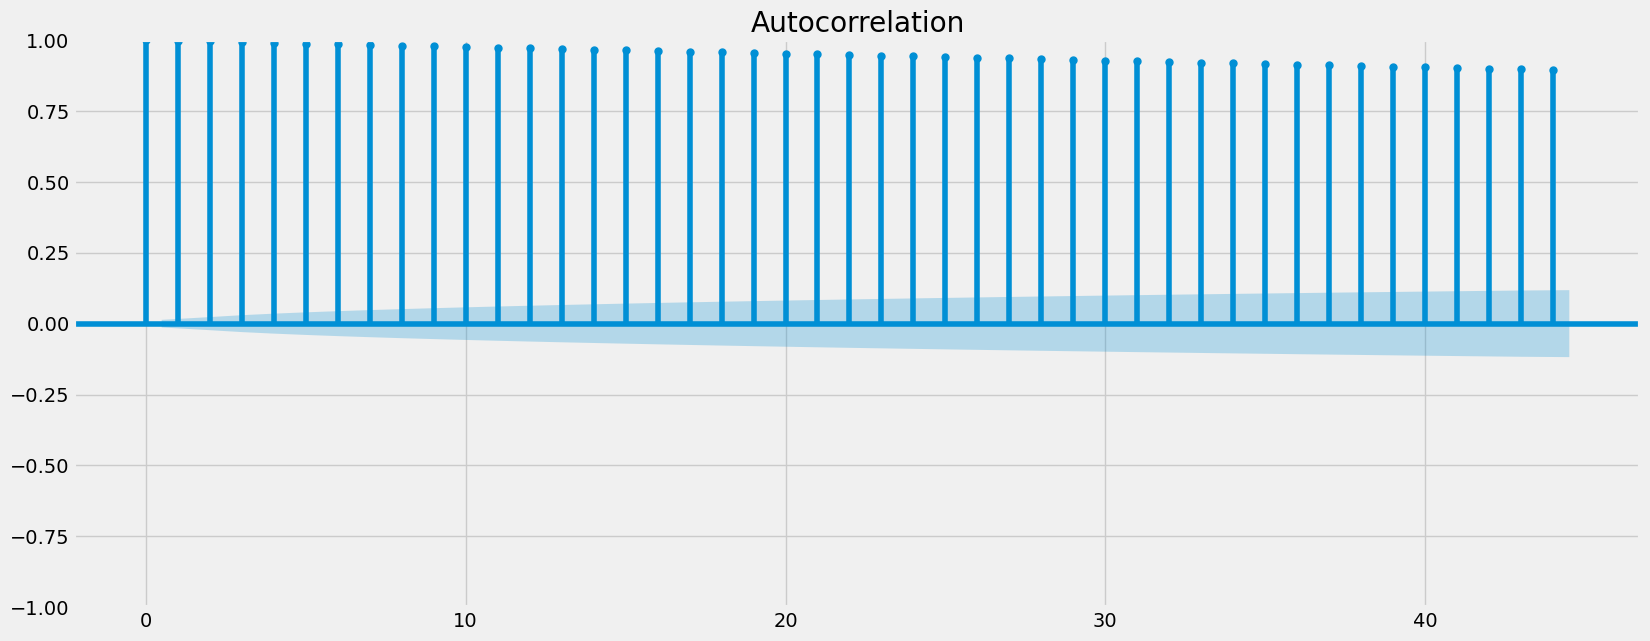

In [22]:
# Checking data for autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_2)
plt.show()

Since the lines go above the edge of the blue confidence interval, this means that the lags are significantly correlated with each other. This implies that the data is non-stationary, which conflicts with the earlier Dickey-Fuller stationarity test.

# 6. Stationarizing the data

In [23]:
# Turning the observation to t-1, making the whole thing t - (t -1)

data_diff = df_2 - df_2.shift(1)

In [24]:
# Removing the missing values resulting from differencing to run the Dickey-Fuller test.

data_diff.dropna(inplace = True)

In [25]:
data_diff.head()

,pts
datetime,
1963-01-02,0.0
1963-01-03,0.0
1963-01-04,0.0
1963-01-05,0.0
1963-01-06,0.0


In [26]:
data_diff.columns

Index(['pts'], dtype='object')

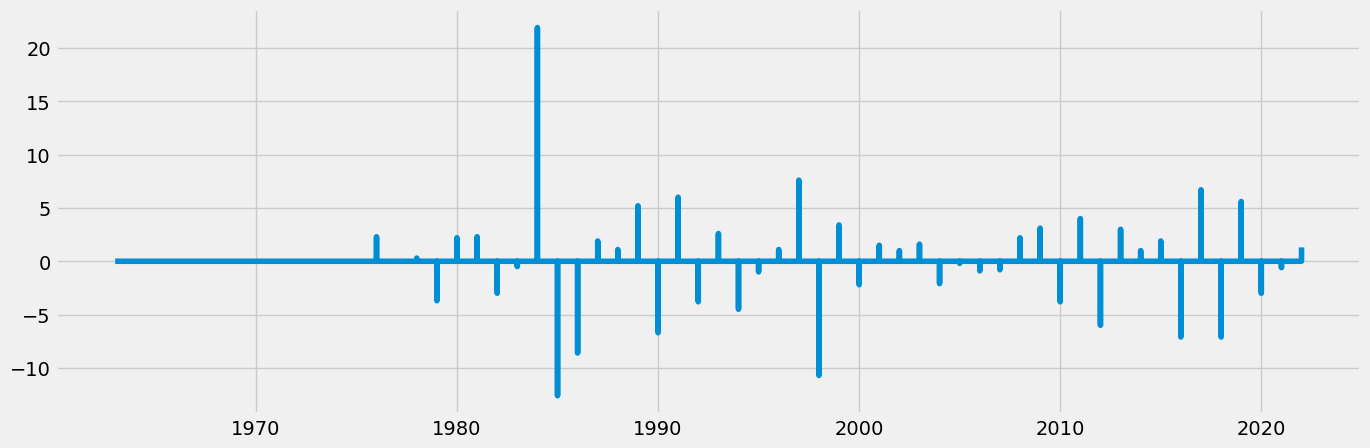

In [27]:
# Looking at what differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [28]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -146.699726
p-value                            0.000000
Number of Lags Used                0.000000
Number of Observations Used    21549.000000
Critical Value (1%)               -3.430653
Critical Value (5%)               -2.861674
Critical Value (10%)              -2.566841
dtype: float64


As above, the Dickey-Fuller Stationarity test results indicate that the data is stationary and that the null hypothesis can be rejected. The values are even more clearly in this direction, based on the fact that the earlier test, prior to differentiation, already indicated stationarity.

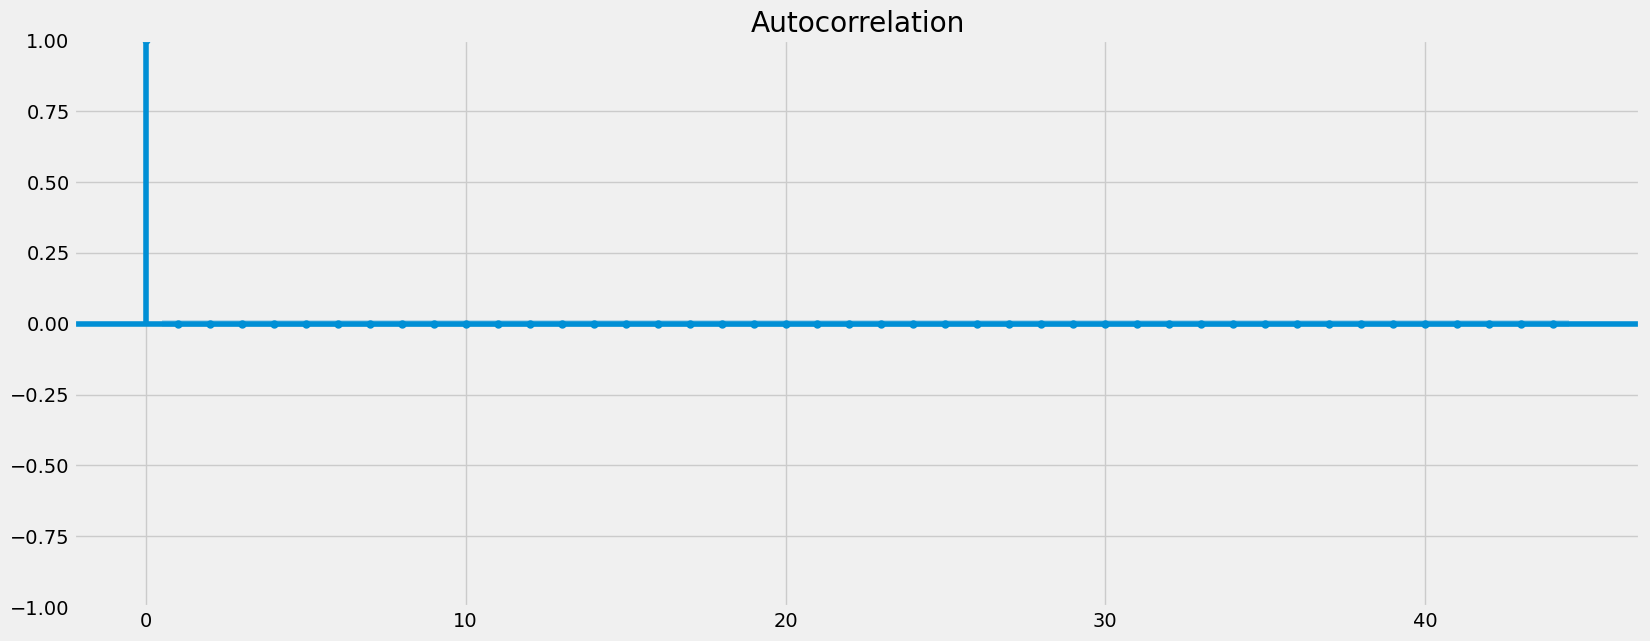

In [29]:
plot_acf(data_diff)
plt.show()